# 机器学习分类算法

In [1]:
# 以下都是例行公事，直接拷贝即可

import pandas as pd
import numpy as np 

# 导入matplotlib.pyplot绘图库，其中plt.plot()是最常用的绘图函数之一
import matplotlib.pyplot as plt 

import seaborn as sns

sns.set() # 默认用seaborn的绘图样式

plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体。如果不设置，中文会乱码。这里采用黑体SimHei，也可以考虑其他字体，如宋体SimSun等
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

# 绘图使用'svg'后端：svg是矢量格式，可以任意缩放均保持清晰，各种屏幕的显示良好。
%config InlineBackend.figure_formats = ['svg']

## 无监督学习

### k-means

##  

In [2]:
np.random.seed(1000) 
np.set_printoptions(suppress=True, precision=4) 

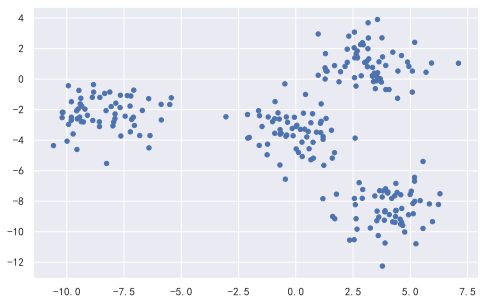

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=250, centers=4,
                  random_state=500, cluster_std=1.25)

plt.figure(figsize=(8, 5)) 
plt.scatter(X[:, 0], X[:, 1], s=20); 

In [4]:
from sklearn.cluster import KMeans


In [5]:
model = KMeans(n_clusters=4, random_state=0)
model.fit(X) 
y_kmeans = model.predict(X)

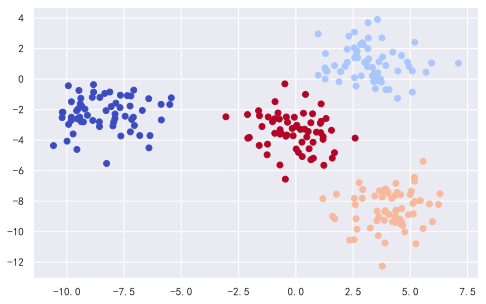

In [6]:
plt.figure(figsize=(8, 5)) 
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='coolwarm'); 

## 有监督学习

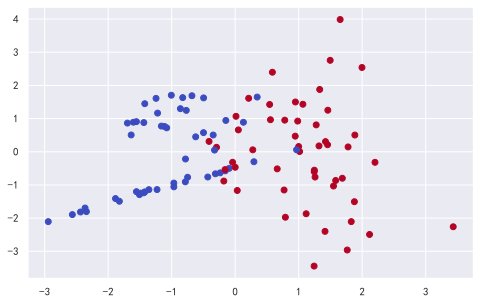

In [7]:
from sklearn.datasets import make_classification 

n_samples = 100 
X, y = make_classification(n_samples=n_samples, n_features=2, 
                                    n_informative=2, n_redundant=0, 
                                    n_repeated=0, random_state=250)


plt.figure(figsize=(8, 5)) 
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap='coolwarm'); 

### 高斯朴素贝叶斯

In [8]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score 

In [9]:
model = GaussianNB()
model.fit(X, y) 

GaussianNB()

In [10]:
model.predict_proba(X).round(4)[:5]

array([[0.0041, 0.9959],
       [0.8534, 0.1466],
       [0.9947, 0.0053],
       [0.0182, 0.9818],
       [0.5156, 0.4844]])

In [11]:
pred = model.predict(X) 
print(pred[:5])
accuracy_score(y, pred)

[1 0 0 1 0]


0.87

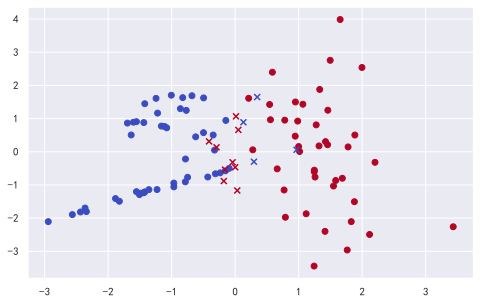

In [12]:
Xc = X[y == pred]
Xf = X[y != pred]

plt.figure(figsize=(8, 5))

plt.scatter(x=Xc[:, 0], y=Xc[:, 1], c=y[y == pred],
            marker='o', cmap='coolwarm')
plt.scatter(x=Xf[:, 0], y=Xf[:, 1], c=y[y != pred],
            marker='x', cmap='coolwarm');


### 逻辑回归

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1, solver='lbfgs') 

In [14]:
model.fit(X,y)
pred = model.predict(X) 
accuracy_score(y, pred) 

0.9

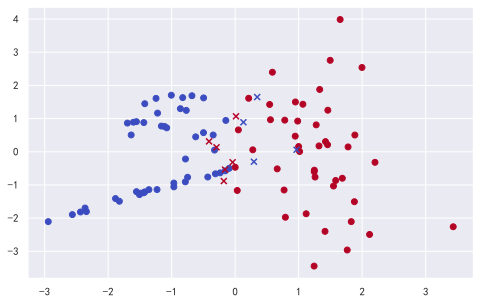

In [15]:
Xc = X[y == pred]
Xf = X[y != pred]

plt.figure(figsize=(8, 5))

plt.scatter(x=Xc[:, 0], y=Xc[:, 1], c=y[y == pred],
            marker='o', cmap='coolwarm')
plt.scatter(x=Xf[:, 0], y=Xf[:, 1], c=y[y != pred],
            marker='x', cmap='coolwarm');

### 决策树

In [16]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4)


In [17]:
model.fit(X, y) 
pred = model.predict(X) 
accuracy_score(y, pred) 

0.97

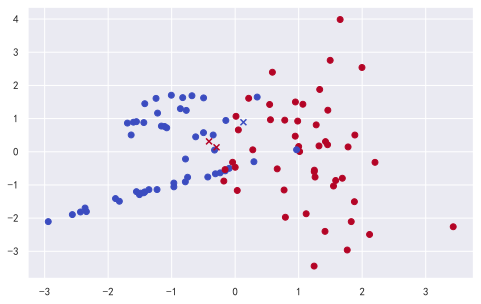

In [18]:
Xc = X[y == pred]
Xf = X[y != pred]

plt.figure(figsize=(8, 5))

plt.scatter(x=Xc[:, 0], y=Xc[:, 1], c=y[y == pred],
            marker='o', cmap='coolwarm')
plt.scatter(x=Xf[:, 0], y=Xf[:, 1], c=y[y != pred],
            marker='x', cmap='coolwarm');

### 深度神经网络

In [19]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                      hidden_layer_sizes=2 * [75], random_state=10)


In [20]:
%time model.fit(X, y) 

CPU times: user 1.49 s, sys: 38.3 ms, total: 1.52 s
Wall time: 195 ms


/home/lee/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=[75, 75], random_state=10,
              solver='lbfgs')

In [21]:
pred = model.predict(X) 
accuracy_score(y, pred) 


1.0

### 支持向量机

In [37]:
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split

In [38]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=0) 

model = SVC(C=1, kernel='linear') 

In [39]:
model.fit(train_x, train_y)

SVC(C=1, kernel='linear')

In [40]:
pred_train = model.predict(train_x) 

In [42]:
accuracy_score(train_y, pred_train)

0.9402985074626866